In [1]:
from pathlib import Path
import re
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import textwrap

In [2]:
path = Path.home() / 'OneDrive - Seagroup/ai/space_image_captioning_dataset'
max_seq_len = 30


def text_normalize(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    text = '<start> ' + text + ' <end>'

    return text


with open(path / 'space_captions.txt', 'r', encoding='utf8') as f:
    lines = f.readlines()
    dataset_dict = {}
    skipped_images_lst = []
    corpus = []
    for line in tqdm(lines):
        line = line.rstrip('\n')
        img_path, caption = line.split('\t')

        tokens = caption.split(' ')
        img_path = path / 'space_images' / img_path.split('/')[-1]

        if len(tokens) < 5 or len(tokens) > (max_seq_len - 2):
            skipped_images_lst.append([img_path, line])
            continue
        else:
            normalized_caption = text_normalize(caption)
            corpus.append(normalized_caption)
            dataset_dict[img_path] = normalized_caption

100%|██████████| 9419/9419 [00:00<00:00, 34593.43it/s]


10it [00:00, 59.60it/s]


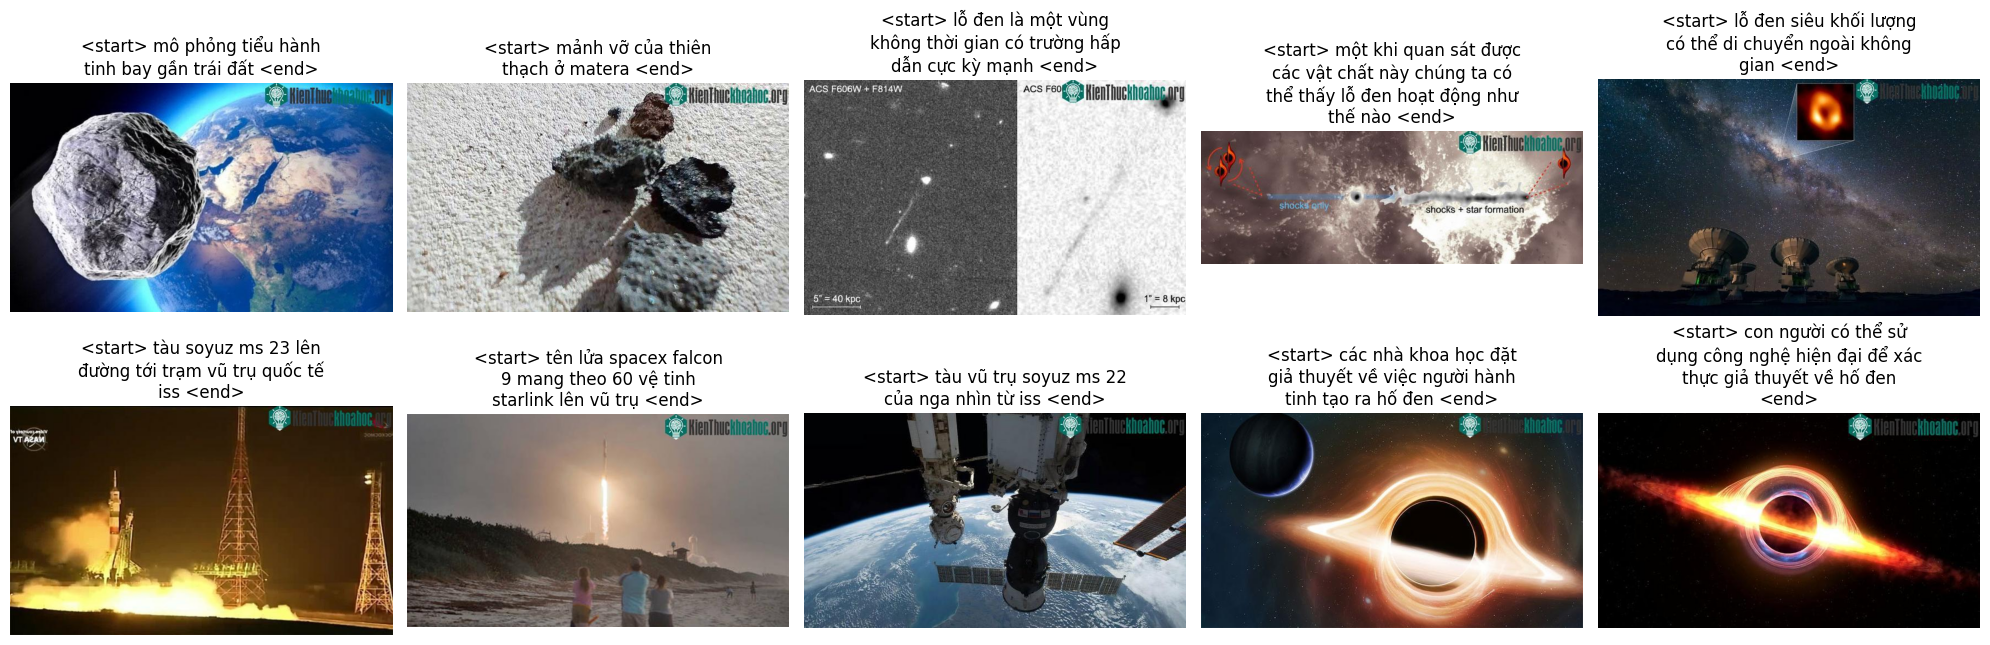

In [44]:
columns = 5
plt.figure(figsize=(20, 10))
num_images = 10
for i, image_path in tqdm(enumerate(list(dataset_dict)[:num_images])):
    # images
    ax = plt.subplot(int(num_images / columns + 1), columns, i + 1)
    ax.imshow(Image.open(str(image_path)))

    # title
    title = textwrap.wrap(dataset_dict[image_path], 30)
    title = "\n".join(title)
    ax.title.set_text(title)
    ax.axis('off')
plt.tight_layout()